# Weather Forecasting using historical data

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Sample historical weather dataset (replace this with actual historical weather data)

In [2]:

data = {
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Temperature': [30, 32, 34, 31, 29, 28, 35, 33, 30, 31],
    'Humidity': [60, 62, 64, 58, 55, 57, 65, 63, 59, 61],
    'Wind Speed': [10, 12, 8, 11, 9, 10, 13, 12, 10, 11],
    'Precipitation': [0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    'Next Day Temperature': [32, 34, 31, 29, 28, 35, 33, 30, 31, 32]  # Target (what we want to predict)
}

In [4]:
df = pd.DataFrame(data)
df.head()

,Day,Temperature,Humidity,Wind Speed,Precipitation,Next Day Temperature
0,1,30,60,10,0,32
1,2,32,62,12,0,34
2,3,34,64,8,1,31
3,4,31,58,11,0,29
4,5,29,55,9,1,28


Features (independent variables) and target (dependent variable)



In [5]:
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation']]
y = df['Next Day Temperature']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Evaluate the model using Mean Squared Error and R^2 Score

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.782670605219969
R^2 Score: -0.6811869356533196


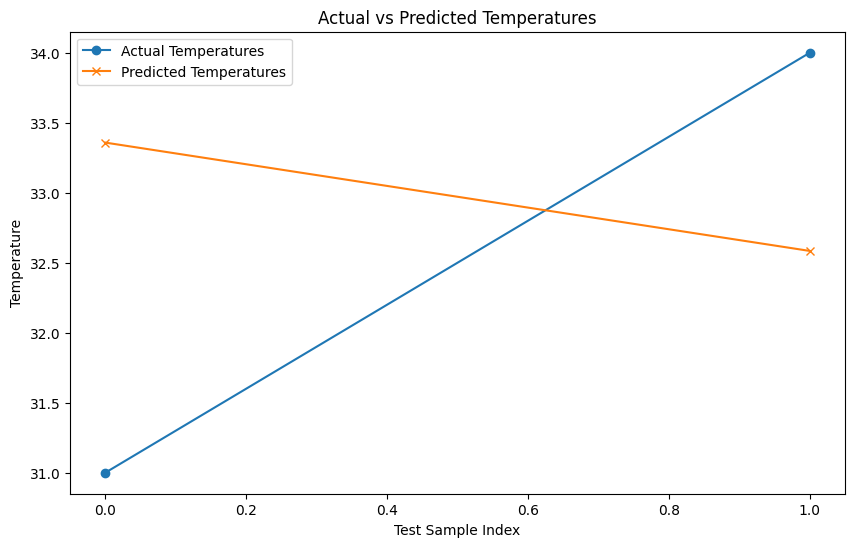

In [12]:
# Plot the actual vs predicted temperatures for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Temperatures", marker='o')
plt.plot(y_pred, label="Predicted Temperatures", marker='x')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Test Sample Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [13]:
# Test the model with new data
new_data = pd.DataFrame({
    'Temperature': [30],
    'Humidity': [60],
    'Wind Speed': [10],
    'Precipitation': [0]
})

predicted_temperature = model.predict(new_data)
print(f"\nPredicted temperature for the next day: {predicted_temperature[0]:.2f}°C")


Predicted temperature for the next day: 31.70°C
